In [1]:
from oandapyV20.endpoints import instruments, orders, accounts
import pandas as pd
import numpy as np
from oandapyV20 import API
from dotenv import load_dotenv
import os
load_dotenv()

account_id = os.getenv('OANDA_ACCOUNT_ID')
access_key = os.getenv('OANDA_ACCESS_KEY')
api = API(access_token=access_key)

In [2]:
from oandapyV20.endpoints import trades, positions

In [3]:
open = positions.OpenPositions(accountID=account_id)
response = api.request(open)

In [4]:
open_trades = trades.OpenTrades(accountID=account_id)
response = api.request(open_trades)
df = pd.DataFrame(response['trades'])
df['unrealizedPL'] = df['unrealizedPL'].astype(float)


In [5]:
df[df['unrealizedPL'] > 0].unrealizedPL.sum(),df[df['unrealizedPL'] < 0].unrealizedPL.sum()

(np.float64(2.4849), np.float64(-12.288999999999998))

In [6]:
df[df['unrealizedPL'] > 0]

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,financing,dividendAdjustment,unrealizedPL,marginUsed,takeProfitOrder,stopLossOrder
1,53165,CAD_SGD,0.92734,2025-08-26T01:11:18.834857400Z,-1000,55.6452,OPEN,-1000,0.0000,0.0000,0.0000,0.0239,55.6458,"{'id': '53166', 'createTime': '2025-08-26T01:1...","{'id': '53167', 'createTime': '2025-08-26T01:1..."
11,53087,SGD_JPY,114.682,2025-08-26T01:09:22.794946504Z,-1000,60.0161,OPEN,-1000,0.0000,0.0000,0.0000,0.0208,60.0132,"{'id': '53088', 'createTime': '2025-08-26T01:0...","{'id': '53089', 'createTime': '2025-08-26T01:0..."
12,53083,USD_JPY,147.278,2025-08-26T01:09:22.688768156Z,-1000,51.3809,OPEN,-1000,0.0000,0.0000,0.0000,0.1562,51.3769,"{'id': '53084', 'createTime': '2025-08-26T01:0...","{'id': '53085', 'createTime': '2025-08-26T01:0..."
13,53061,CAD_JPY,106.358,2025-08-26T01:08:27.177158541Z,-1000,37.1038,OPEN,-1000,0.0000,0.0000,0.0000,0.1875,37.0972,"{'id': '53062', 'createTime': '2025-08-26T01:0...","{'id': '53063', 'createTime': '2025-08-26T01:0..."
14,53057,CHF_JPY,183.193,2025-08-26T01:08:27.021082463Z,-1000,63.9127,OPEN,-1000,0.0000,0.0000,0.0000,0.3541,63.8961,"{'id': '53058', 'createTime': '2025-08-26T01:0...","{'id': '53059', 'createTime': '2025-08-26T01:0..."
15,53048,SGD_JPY,114.691,2025-08-26T01:08:26.704385950Z,-1000,60.0197,OPEN,-1000,0.0000,0.0000,0.0000,0.1146,60.0132,"{'id': '53049', 'createTime': '2025-08-26T01:0...","{'id': '53050', 'createTime': '2025-08-26T01:0..."
18,53000,EUR_JPY,171.483,2025-08-26T01:07:19.452496901Z,-1000,59.8247,OPEN,-1000,0.0000,0.0000,0.0000,0.3749,59.8127,"{'id': '53001', 'createTime': '2025-08-26T01:0...","{'id': '53002', 'createTime': '2025-08-26T01:0..."
30,52843,AUD_SGD,0.83327,2025-08-26T01:04:28.360038862Z,-1000,50.0000,OPEN,-1000,0.0000,0.0000,0.0000,0.0239,50.0000,"{'id': '52844', 'createTime': '2025-08-26T01:0...","{'id': '52845', 'createTime': '2025-08-26T01:0..."
39,51549,ZAR_JPY,8.383,2025-08-25T23:58:21.860873968Z,-1000,4.3768,OPEN,-1000,0.0000,0.0000,0.0000,0.0729,4.3803,"{'id': '51550', 'createTime': '2025-08-25T23:5...","{'id': '51551', 'createTime': '2025-08-25T23:5..."
40,51531,ZAR_JPY,8.382,2025-08-25T23:56:21.690875241Z,-1000,4.3771,OPEN,-1000,0.0000,0.0000,0.0000,0.0625,4.3803,"{'id': '51532', 'createTime': '2025-08-25T23:5...","{'id': '51533', 'createTime': '2025-08-25T23:5..."


In [7]:
df[df['unrealizedPL'] > 0].instrument.value_counts()

instrument
ZAR_JPY    16
SGD_JPY     2
USD_JPY     1
CAD_SGD     1
CAD_JPY     1
CHF_JPY     1
EUR_JPY     1
AUD_SGD     1
Name: count, dtype: int64

In [8]:
df[df['unrealizedPL'] < 0].instrument.value_counts()

instrument
HKD_JPY    25
USD_CAD     3
CAD_SGD     3
EUR_NZD     2
CAD_JPY     2
EUR_SGD     2
USD_CHF     2
CAD_CHF     2
GBP_CAD     2
USD_SGD     2
GBP_SGD     1
GBP_USD     1
ZAR_JPY     1
AUD_JPY     1
NZD_CHF     1
NZD_SGD     1
NZD_CAD     1
AUD_CHF     1
AUD_CAD     1
AUD_SGD     1
Name: count, dtype: int64

In [9]:
def get_all_closed_trades(api, account_id):
    all_trades = []
    before_id = None
    
    while True:
        params = {
            'state': 'CLOSED',
            'count': 500
        }
        
        # Add beforeID for pagination
        if before_id:
            params['beforeID'] = before_id
            
        r = trades.TradesList(accountID=account_id, params=params)
        response = api.request(r)
        trades_batch = response['trades']
        
        if not trades_batch:  # No more trades
            break
            
        all_trades.extend(trades_batch)
        
        # Get the oldest trade ID for next batch
        before_id = trades_batch[-1]['id']
        
        print(f"Retrieved {len(trades_batch)} trades, total: {len(all_trades)}")
        
        # Break if we got less than 500 (last batch)
        if len(trades_batch) < 500:
            break
    
    return pd.DataFrame(all_trades)

# Get all closed trades
df = get_all_closed_trades(api, account_id)
print(f"Total closed trades: {df.shape[0]}")


Retrieved 500 trades, total: 500
Retrieved 500 trades, total: 1000
Retrieved 500 trades, total: 1000
Retrieved 500 trades, total: 1500
Retrieved 500 trades, total: 1500
Retrieved 500 trades, total: 2000
Retrieved 500 trades, total: 2000
Retrieved 500 trades, total: 2500
Retrieved 500 trades, total: 2500
Retrieved 500 trades, total: 3000
Retrieved 500 trades, total: 3000
Retrieved 500 trades, total: 3500
Retrieved 500 trades, total: 3500
Retrieved 500 trades, total: 4000
Retrieved 500 trades, total: 4000
Retrieved 500 trades, total: 4500
Retrieved 500 trades, total: 4500
Retrieved 500 trades, total: 5000
Retrieved 500 trades, total: 5000
Retrieved 500 trades, total: 5500
Retrieved 500 trades, total: 5500
Retrieved 500 trades, total: 6000
Retrieved 500 trades, total: 6000
Retrieved 259 trades, total: 6259
Total closed trades: 6259
Retrieved 259 trades, total: 6259
Total closed trades: 6259


In [10]:
def analyze_closed_trades(df):
    # Convert string columns to appropriate types
    df['realizedPL'] = pd.to_numeric(df['realizedPL'])
    df['financing'] = pd.to_numeric(df['financing'])
    df['openTime'] = pd.to_datetime(df['openTime'])
    df['closeTime'] = pd.to_datetime(df['closeTime'])
    
    # Calculate additional metrics
    df['trade_duration'] = df['closeTime'] - df['openTime']
    df['trade_duration_minutes'] = df['trade_duration'].dt.total_seconds() / 60
    df['net_pl'] = df['realizedPL'] + df['financing']  # Include financing costs
    
    # Determine trade direction
    df['units'] = pd.to_numeric(df['initialUnits'])
    df['side'] = df['units'].apply(lambda x: 'BUY' if x > 0 else 'SELL')
    
    # Calculate win/loss
    df['is_winner'] = df['net_pl'] > 0
    
    return df

# Analyze the data
df = analyze_closed_trades(df)

# Performance summary
total_pl = df['net_pl'].sum()
win_rate = df['is_winner'].mean() * 100
avg_winner = df[df['is_winner']]['net_pl'].mean()
avg_loser = df[~df['is_winner']]['net_pl'].mean()
total_trades = len(df)

print(f"""
📊 TRADING PERFORMANCE SUMMARY
═══════════════════════════════
Total Trades: {total_trades}
Total P&L: ${total_pl:.2f}
Win Rate: {win_rate:.1f}%
Average Winner: ${avg_winner:.2f}
Average Loser: ${avg_loser:.2f}
""")



📊 TRADING PERFORMANCE SUMMARY
═══════════════════════════════
Total Trades: 6259
Total P&L: $-2104.95
Win Rate: 25.9%
Average Winner: $0.41
Average Loser: $-0.60



In [11]:
# Performance by instrument
instrument_analysis = df.groupby('instrument').agg({
    'net_pl': ['sum', 'mean', 'count'],
    'is_winner': 'mean',
    'trade_duration_minutes': 'mean'
}).round(2)

instrument_analysis.columns = ['Total_PL', 'Avg_PL', 'Trade_Count', 'Win_Rate', 'Avg_Duration_Min']
print("\n📈 PERFORMANCE BY INSTRUMENT:")
print(instrument_analysis.sort_values('Total_PL', ascending=False))

# Performance by side (BUY vs SELL)
side_analysis = df.groupby('side').agg({
    'net_pl': ['sum', 'mean', 'count'],
    'is_winner': 'mean'
}).round(2)
print("\n📊 PERFORMANCE BY SIDE:")
print(side_analysis)



📈 PERFORMANCE BY INSTRUMENT:
            Total_PL  Avg_PL  Trade_Count  Win_Rate  Avg_Duration_Min
instrument                                                           
USD_CAD        12.00    0.08          154      0.57             49.09
USD_JPY         9.31    0.04          243      0.47             23.92
EUR_DKK        -0.40   -0.40            1      0.00            349.22
ZAR_JPY        -1.30   -0.26            5      0.00            403.91
GBP_PLN        -1.54   -1.54            1      0.00              0.03
...              ...     ...          ...       ...               ...
GBP_JPY       -65.66   -0.43          153      0.20              8.06
GBP_SGD       -66.78   -0.53          126      0.19             11.02
SGD_CHF       -79.86   -0.68          117      0.15             41.88
AUD_NZD      -105.98   -0.75          142      0.12            158.41
NZD_CHF      -122.39   -0.79          154      0.16             89.18

[64 rows x 5 columns]

📊 PERFORMANCE BY SIDE:
       net_pl

In [12]:
side_analysis

net_pl             is_winner
          sum  mean count      mean
side                               
BUY   -999.54 -0.31  3266      0.30
SELL -1105.41 -0.37  2993      0.21

In [13]:
# Performance over time
df['date'] = df['closeTime'].dt.date

In [14]:
df['minute']= df['closeTime'].dt.time

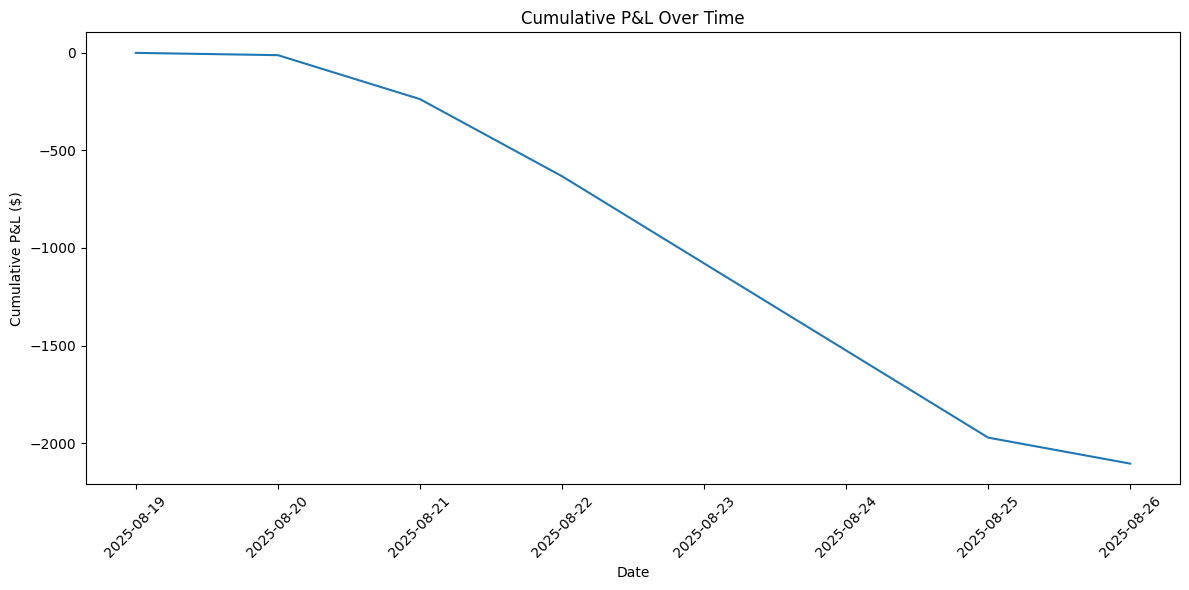

In [15]:

daily_pl = df.groupby('date')['net_pl'].sum().cumsum()

# Plot cumulative P&L
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(daily_pl.index, daily_pl.values)
plt.title('Cumulative P&L Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative P&L ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [16]:
df.groupby('minute')['net_pl'].sum().cumsum()

minute
00:00:19.412049      -0.2190
00:01:03.325053      -0.3910
00:01:08.960299      -0.9574
00:01:14.487425       0.6799
00:01:14.617546       3.0633
                     ...    
23:53:19.896856   -2103.6264
23:53:51.575622   -2104.3082
23:56:24.089234   -2104.5737
23:56:26.281824   -2105.1716
23:59:20.876004   -2104.9516
Name: net_pl, Length: 5047, dtype: float64

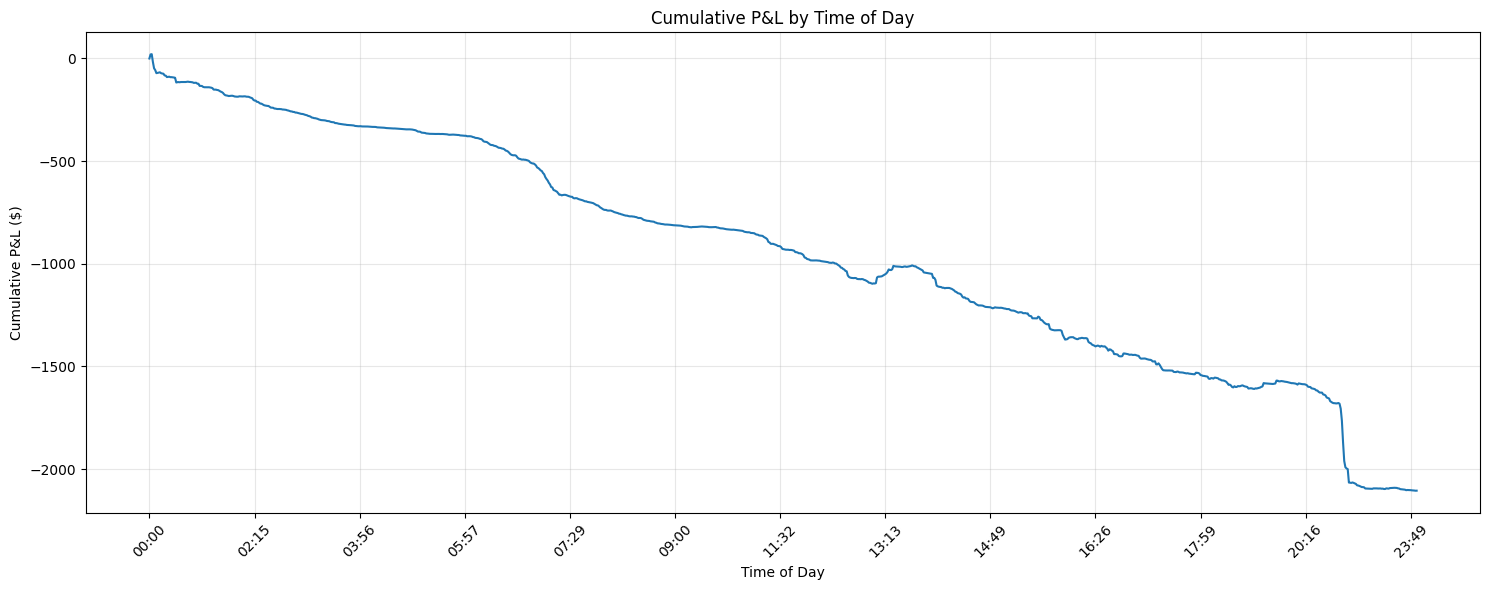


Most Profitable Times:
minute
13:05    27.8005
00:01    19.8164
13:20    16.5108
19:09    16.3675
19:38    14.1948
Name: net_pl, dtype: float64


In [17]:
# Create a time-based analysis
# Convert closeTime to just time part and group by minute
df['minute'] = df['closeTime'].dt.strftime('%H:%M')  # Format as HH:MM
daily_pl = df.groupby('minute')['net_pl'].sum()

# Sort by time for proper visualization
daily_pl = daily_pl.reindex(sorted(daily_pl.index))
cumulative_pl = daily_pl.cumsum()

# Plot cumulative P&L
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
plt.plot(range(len(cumulative_pl)), cumulative_pl.values)
plt.title('Cumulative P&L by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Cumulative P&L ($)')

# Set x-axis ticks to show times
plt.xticks(
    range(0, len(cumulative_pl), len(cumulative_pl)//12),  # Show 12 time points
    [cumulative_pl.index[i] for i in range(0, len(cumulative_pl), len(cumulative_pl)//12)],
    rotation=45
)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print some statistics about profitable times
print("\nMost Profitable Times:")
print(daily_pl.sort_values(ascending=False).head())

In [18]:
df['date'] = df['closeTime'].dt.date


In [19]:
df

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,closingTransactionIDs,...,takeProfitOrder,stopLossOrder,trade_duration,trade_duration_minutes,net_pl,units,side,is_winner,date,minute
0,53155,USD_DKK,6.40950,2025-08-26 01:10:18.945578595+00:00,-1000,77.0695,CLOSED,0,-0.6935,[53180],...,"{'id': '53156', 'createTime': '2025-08-26T01:1...","{'id': '53157', 'createTime': '2025-08-26T01:1...",0 days 00:02:26.916876316,2.448615,-0.6935,-1000,SELL,False,2025-08-26,01:12
1,53142,USD_NOK,10.10977,2025-08-26 01:10:18.462298042+00:00,-1000,77.0695,CLOSED,0,-0.8425,[53168],...,"{'id': '53143', 'createTime': '2025-08-26T01:1...","{'id': '53144', 'createTime': '2025-08-26T01:1...",0 days 00:02:11.943510039,2.199059,-0.8425,-1000,SELL,False,2025-08-26,01:12
2,53126,USD_DKK,6.40936,2025-08-26 01:09:23.853532924+00:00,-1000,77.0683,CLOSED,0,-0.7007,[53176],...,"{'id': '53127', 'createTime': '2025-08-26T01:0...","{'id': '53128', 'createTime': '2025-08-26T01:0...",0 days 00:03:21.957754334,3.365963,-0.7007,-1000,SELL,False,2025-08-26,01:12
3,53117,GBP_JPY,198.417,2025-08-26 01:09:23.618076492+00:00,-1000,69.2280,CLOSED,0,0.1354,[53170],...,"{'id': '53118', 'createTime': '2025-08-26T01:0...","{'id': '53119', 'createTime': '2025-08-26T01:0...",0 days 00:03:18.953738720,3.315896,0.1354,-1000,SELL,True,2025-08-26,01:12
4,53044,EUR_CAD,1.61266,2025-08-26 01:08:26.477178825+00:00,1000,59.8287,CLOSED,0,-0.5370,[53078],...,"{'id': '53045', 'createTime': '2025-08-26T01:0...","{'id': '53046', 'createTime': '2025-08-26T01:0...",0 days 00:00:15.696933321,0.261616,-0.5370,1000,BUY,False,2025-08-26,01:08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6254,31,AUD_USD,0.64797,2025-08-19 13:38:02.981853131+00:00,-1000,33.3333,CLOSED,0,0.0461,[34],...,"{'id': '32', 'createTime': '2025-08-19T13:38:0...","{'id': '33', 'createTime': '2025-08-19T13:38:0...",0 days 00:04:31.145230885,4.519087,0.0461,-1000,SELL,True,2025-08-19,13:42
6255,25,AUD_USD,0.64889,2025-08-19 12:32:03.436072557+00:00,1000,33.3333,CLOSED,0,-0.1394,[28],...,"{'id': '26', 'createTime': '2025-08-19T12:32:0...","{'id': '27', 'createTime': '2025-08-19T12:32:0...",0 days 00:00:24.514026083,0.408567,-0.1394,1000,BUY,False,2025-08-19,12:32
6256,19,AUD_USD,0.64902,2025-08-19 12:31:03.866321825+00:00,1000,33.3333,CLOSED,0,-0.3408,[22],...,"{'id': '20', 'createTime': '2025-08-19T12:31:0...","{'id': '21', 'createTime': '2025-08-19T12:31:0...",0 days 00:00:26.982879917,0.449715,-0.3408,1000,BUY,False,2025-08-19,12:31
6257,11,EUR_USD,1.16917,2025-08-19 11:06:00.210461654+00:00,-1000,60.0327,CLOSED,0,0.1686,[16],...,"{'id': '12', 'createTime': '2025-08-19T11:06:0...","{'id': '13', 'createTime': '2025-08-19T11:06:0...",0 days 00:03:51.766752625,3.862779,0.1686,-1000,SELL,True,2025-08-19,11:09


In [20]:
response = api.request(positions.OpenPositions(accountID=account_id))
df = pd.DataFrame(response['positions'])
df['unrealizedPL'] = df['unrealizedPL'].astype(float)
df[df['unrealizedPL'] > 0].unrealizedPL.sum(),df[df['unrealizedPL'] < 0].unrealizedPL.sum()

(np.float64(2.6856), np.float64(-11.9794))

In [21]:
df

,instrument,long,short,pl,resettablePL,financing,commission,dividendAdjustment,guaranteedExecutionFees,unrealizedPL,marginUsed
0,ZAR_JPY,"{'units': '0', 'pl': '0.0000', 'resettablePL':...","{'units': '-18000', 'averagePrice': '8.382', '...",-1.1755,-1.1755,-0.4320,0.0000,0.0000,0.0000,1.1448,78.8476
1,HKD_JPY,"{'units': '25000', 'averagePrice': '18.86430',...","{'units': '0', 'pl': '-3.3067', 'resettablePL'...",-37.6068,-37.6068,-0.2805,0.0000,0.0000,0.0000,-1.8762,246.7520
2,CHF_JPY,"{'units': '0', 'pl': '3.7418', 'resettablePL':...","{'units': '-1000', 'averagePrice': '183.193', ...",-30.9235,-30.9235,0.0000,0.0000,0.0000,0.0000,0.4895,63.8955
3,USD_CHF,"{'units': '0', 'pl': '-34.3904', 'resettablePL...","{'units': '-2000', 'averagePrice': '0.80384', ...",-55.1499,-55.1499,0.2910,0.0000,0.0000,0.0000,-1.2330,102.7570
4,USD_CAD,"{'units': '0', 'pl': '18.3902', 'resettablePL'...","{'units': '-3000', 'averagePrice': '1.38485', ...",11.4578,11.4578,0.5434,0.0000,0.0000,0.0000,-0.7382,154.1355
5,SGD_JPY,"{'units': '0', 'pl': '-28.0070', 'resettablePL...","{'units': '-2000', 'averagePrice': '114.686', ...",-46.5182,-46.5182,0.0000,0.0000,0.0000,0.0000,0.2604,120.0264
6,USD_JPY,"{'units': '0', 'pl': '17.3519', 'resettablePL'...","{'units': '-1000', 'averagePrice': '147.278', ...",9.1894,9.1894,0.1249,0.0000,0.0000,0.0000,0.2083,51.3785
7,GBP_USD,"{'units': '1000', 'averagePrice': '1.34757', '...","{'units': '0', 'pl': '-25.2701', 'resettablePL...",-51.4687,-51.4687,-0.0331,0.0000,0.0000,0.0000,-0.4492,69.2230
8,GBP_SGD,"{'units': '1000', 'averagePrice': '1.73055', '...","{'units': '0', 'pl': '-29.9870', 'resettablePL...",-66.7828,-66.7828,0.0000,0.0000,0.0000,0.0000,-0.5669,103.8345
9,EUR_NZD,"{'units': '2000', 'averagePrice': '1.98942', '...","{'units': '0', 'pl': '-25.3627', 'resettablePL...",-29.0585,-29.0585,0.0000,0.0000,0.0000,0.0000,-1.1333,179.4380


In [22]:
df['unrealizedPL'].sum()

np.float64(-9.2938)

In [23]:
profit = set(df[df['unrealizedPL'] > 0].instrument)

In [24]:
loss = set(df[df['unrealizedPL'] < 0].instrument)

In [25]:
profit.union(loss)

{'AUD_CAD',
 'AUD_CHF',
 'AUD_JPY',
 'AUD_SGD',
 'CAD_CHF',
 'CAD_JPY',
 'CAD_SGD',
 'CHF_JPY',
 'EUR_JPY',
 'EUR_NZD',
 'EUR_SGD',
 'GBP_CAD',
 'GBP_SGD',
 'GBP_USD',
 'HKD_JPY',
 'NZD_CAD',
 'NZD_CHF',
 'NZD_SGD',
 'SGD_JPY',
 'USD_CAD',
 'USD_CHF',
 'USD_JPY',
 'USD_SGD',
 'ZAR_JPY'}

In [26]:
df

,instrument,long,short,pl,resettablePL,financing,commission,dividendAdjustment,guaranteedExecutionFees,unrealizedPL,marginUsed
0,ZAR_JPY,"{'units': '0', 'pl': '0.0000', 'resettablePL':...","{'units': '-18000', 'averagePrice': '8.382', '...",-1.1755,-1.1755,-0.4320,0.0000,0.0000,0.0000,1.1448,78.8476
1,HKD_JPY,"{'units': '25000', 'averagePrice': '18.86430',...","{'units': '0', 'pl': '-3.3067', 'resettablePL'...",-37.6068,-37.6068,-0.2805,0.0000,0.0000,0.0000,-1.8762,246.7520
2,CHF_JPY,"{'units': '0', 'pl': '3.7418', 'resettablePL':...","{'units': '-1000', 'averagePrice': '183.193', ...",-30.9235,-30.9235,0.0000,0.0000,0.0000,0.0000,0.4895,63.8955
3,USD_CHF,"{'units': '0', 'pl': '-34.3904', 'resettablePL...","{'units': '-2000', 'averagePrice': '0.80384', ...",-55.1499,-55.1499,0.2910,0.0000,0.0000,0.0000,-1.2330,102.7570
4,USD_CAD,"{'units': '0', 'pl': '18.3902', 'resettablePL'...","{'units': '-3000', 'averagePrice': '1.38485', ...",11.4578,11.4578,0.5434,0.0000,0.0000,0.0000,-0.7382,154.1355
5,SGD_JPY,"{'units': '0', 'pl': '-28.0070', 'resettablePL...","{'units': '-2000', 'averagePrice': '114.686', ...",-46.5182,-46.5182,0.0000,0.0000,0.0000,0.0000,0.2604,120.0264
6,USD_JPY,"{'units': '0', 'pl': '17.3519', 'resettablePL'...","{'units': '-1000', 'averagePrice': '147.278', ...",9.1894,9.1894,0.1249,0.0000,0.0000,0.0000,0.2083,51.3785
7,GBP_USD,"{'units': '1000', 'averagePrice': '1.34757', '...","{'units': '0', 'pl': '-25.2701', 'resettablePL...",-51.4687,-51.4687,-0.0331,0.0000,0.0000,0.0000,-0.4492,69.2230
8,GBP_SGD,"{'units': '1000', 'averagePrice': '1.73055', '...","{'units': '0', 'pl': '-29.9870', 'resettablePL...",-66.7828,-66.7828,0.0000,0.0000,0.0000,0.0000,-0.5669,103.8345
9,EUR_NZD,"{'units': '2000', 'averagePrice': '1.98942', '...","{'units': '0', 'pl': '-25.3627', 'resettablePL...",-29.0585,-29.0585,0.0000,0.0000,0.0000,0.0000,-1.1333,179.4380


In [30]:
df = get_all_closed_trades(api, account_id)
print(f"Total closed trades: {df.shape[0]}")

Retrieved 500 trades, total: 500
Retrieved 500 trades, total: 1000
Retrieved 500 trades, total: 1500
Retrieved 500 trades, total: 2000
Retrieved 500 trades, total: 2500
Retrieved 500 trades, total: 3000
Retrieved 500 trades, total: 3500
Retrieved 500 trades, total: 4000
Retrieved 500 trades, total: 4500
Retrieved 500 trades, total: 5000
Retrieved 500 trades, total: 5500
Retrieved 500 trades, total: 6000
Retrieved 267 trades, total: 6267
Total closed trades: 6267


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6267 non-null   object
 1   instrument             6267 non-null   object
 2   price                  6267 non-null   object
 3   openTime               6267 non-null   object
 4   initialUnits           6267 non-null   object
 5   initialMarginRequired  6267 non-null   object
 6   state                  6267 non-null   object
 7   currentUnits           6267 non-null   object
 8   realizedPL             6267 non-null   object
 9   closingTransactionIDs  6267 non-null   object
 10  financing              6267 non-null   object
 11  dividendAdjustment     6267 non-null   object
 12  closeTime              6267 non-null   object
 13  averageClosePrice      6267 non-null   object
 14  takeProfitOrder        6267 non-null   object
 15  stopLossOrder        

In [35]:
df

,id,instrument,price,openTime,initialUnits,initialMarginRequired,state,currentUnits,realizedPL,closingTransactionIDs,financing,dividendAdjustment,closeTime,averageClosePrice,takeProfitOrder,stopLossOrder
0,53155,USD_DKK,6.40950,2025-08-26T01:10:18.945578595Z,-1000,77.0695,CLOSED,0,-0.6935,[53180],0.0000,0.0000,2025-08-26T01:12:45.862454911Z,6.41237,"{'id': '53156', 'createTime': '2025-08-26T01:1...","{'id': '53157', 'createTime': '2025-08-26T01:1..."
1,53142,USD_NOK,10.10977,2025-08-26T01:10:18.462298042Z,-1000,77.0695,CLOSED,0,-0.8425,[53168],0.0000,0.0000,2025-08-26T01:12:30.405808081Z,10.11527,"{'id': '53143', 'createTime': '2025-08-26T01:1...","{'id': '53144', 'createTime': '2025-08-26T01:1..."
2,53126,USD_DKK,6.40936,2025-08-26T01:09:23.853532924Z,-1000,77.0683,CLOSED,0,-0.7007,[53176],0.0000,0.0000,2025-08-26T01:12:45.811287258Z,6.41226,"{'id': '53127', 'createTime': '2025-08-26T01:0...","{'id': '53128', 'createTime': '2025-08-26T01:0..."
3,53117,GBP_JPY,198.417,2025-08-26T01:09:23.618076492Z,-1000,69.2280,CLOSED,0,0.1354,[53170],0.0000,0.0000,2025-08-26T01:12:42.571815212Z,198.404,"{'id': '53118', 'createTime': '2025-08-26T01:0...","{'id': '53119', 'createTime': '2025-08-26T01:0..."
4,53113,GBP_CAD,1.86618,2025-08-26T01:09:23.555960103Z,1000,69.2280,CLOSED,0,-0.7159,[53190],0.0000,0.0000,2025-08-26T01:14:18.680574805Z,1.86554,"{'id': '53114', 'createTime': '2025-08-26T01:0...","{'id': '53115', 'createTime': '2025-08-26T01:0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6262,31,AUD_USD,0.64797,2025-08-19T13:38:02.981853131Z,-1000,33.3333,CLOSED,0,0.0461,[34],0.0000,0.0000,2025-08-19T13:42:34.127084016Z,0.64794,"{'id': '32', 'createTime': '2025-08-19T13:38:0...","{'id': '33', 'createTime': '2025-08-19T13:38:0..."
6263,25,AUD_USD,0.64889,2025-08-19T12:32:03.436072557Z,1000,33.3333,CLOSED,0,-0.1394,[28],0.0000,0.0000,2025-08-19T12:32:27.950098640Z,0.64880,"{'id': '26', 'createTime': '2025-08-19T12:32:0...","{'id': '27', 'createTime': '2025-08-19T12:32:0..."
6264,19,AUD_USD,0.64902,2025-08-19T12:31:03.866321825Z,1000,33.3333,CLOSED,0,-0.3408,[22],0.0000,0.0000,2025-08-19T12:31:30.849201742Z,0.64880,"{'id': '20', 'createTime': '2025-08-19T12:31:0...","{'id': '21', 'createTime': '2025-08-19T12:31:0..."
6265,11,EUR_USD,1.16917,2025-08-19T11:06:00.210461654Z,-1000,60.0327,CLOSED,0,0.1686,[16],0.0000,0.0000,2025-08-19T11:09:51.977214279Z,1.16906,"{'id': '12', 'createTime': '2025-08-19T11:06:0...","{'id': '13', 'createTime': '2025-08-19T11:06:0..."


In [40]:
pd.DataFrame([values for values in df['takeProfitOrder']]).iloc[0],pd.DataFrame([values for values in df['stopLossOrder']]).iloc[0],df.iloc[0]

(id                                                  53156
 createTime                 2025-08-26T01:10:18.945578595Z
 type                                          TAKE_PROFIT
 tradeID                                             53155
 price                                             6.40854
 timeInForce                                           GTC
 triggerCondition                                  DEFAULT
 state                                           CANCELLED
 cancellingTransactionID                             53181
 cancelledTime              2025-08-26T01:12:45.862454911Z
 fillingTransactionID                                  NaN
 filledTime                                            NaN
 tradeClosedIDs                                        NaN
 replacesOrderID                                       NaN
 Name: 0, dtype: object,
 id                                                  53157
 createTime                 2025-08-26T01:10:18.945578595Z
 type                          

In [43]:
df["takeProfitPrice"] = df["takeProfitOrder"].apply(lambda x: x.get("price") if isinstance(x, dict) else None)
df["stopLossPrice"]   = df["stopLossOrder"].apply(lambda x: x.get("price") if isinstance(x, dict) else None)

# Build clean summary DataFrame
trade_summary = df[[
    "id", 
    "instrument", 
    "price",               # open price
    "takeProfitPrice", 
    "stopLossPrice", 
    "averageClosePrice",   # close price
    "realizedPL"
]].rename(columns={
    "id": "tradeID",
    "price": "openPrice",
    "averageClosePrice": "closePrice"
})

In [56]:
trade_summary["realizedPL"] = trade_summary["realizedPL"].astype(float)

<Axes: title={'center': 'Number of Trades by Instrument'}, xlabel='instrument'>

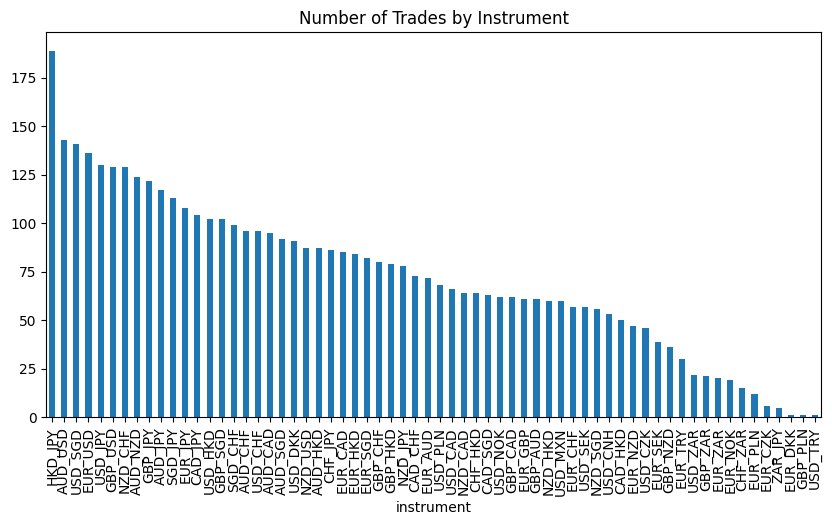

In [ ]:
trade_summary[trade_summary['realizedPL'] < 0]['instrument'].value_counts().plot(kind='bar', figsize=(10,5), title='Number of Trades by Instrument')

In [59]:
df = trade_summary

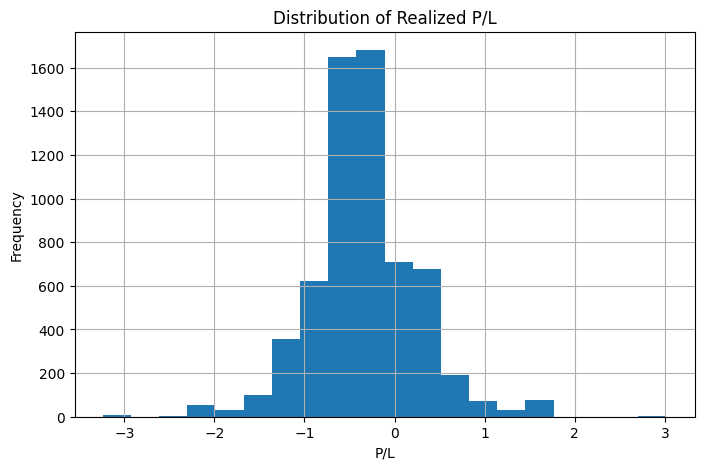

In [60]:
# 1. Distribution of realized P/L
plt.figure(figsize=(8,5))
df["realizedPL"].hist(bins=20)
plt.title("Distribution of Realized P/L")
plt.xlabel("P/L")
plt.ylabel("Frequency")
plt.show()


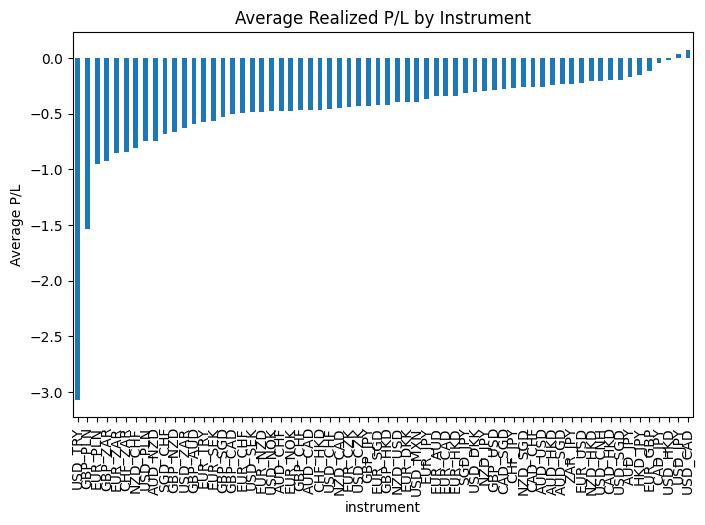

In [61]:

# 2. Average realized P/L by instrument
plt.figure(figsize=(8,5))
df.groupby("instrument")["realizedPL"].mean().sort_values().plot(kind="bar")
plt.title("Average Realized P/L by Instrument")
plt.ylabel("Average P/L")
plt.show()


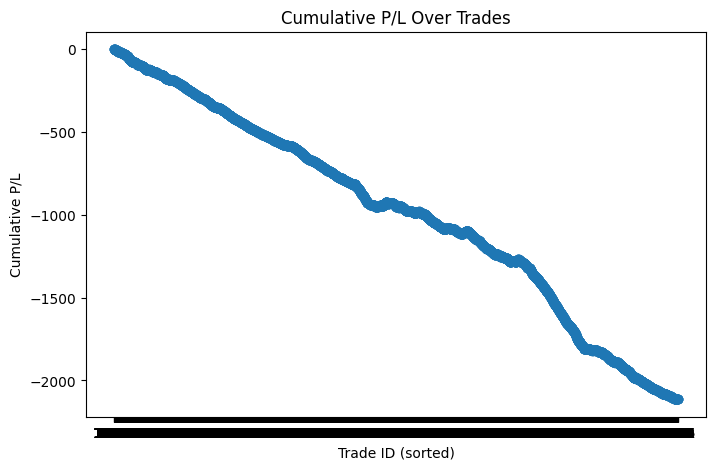

In [62]:

# 3. Cumulative P/L over trades (by tradeID order)
plt.figure(figsize=(8,5))
df_sorted = df.sort_values("tradeID")
df_sorted["cumulativePL"] = df_sorted["realizedPL"].cumsum()
plt.plot(df_sorted["tradeID"], df_sorted["cumulativePL"], marker="o")
plt.title("Cumulative P/L Over Trades")
plt.xlabel("Trade ID (sorted)")
plt.ylabel("Cumulative P/L")
plt.show()




<Figure size 800x500 with 0 Axes>

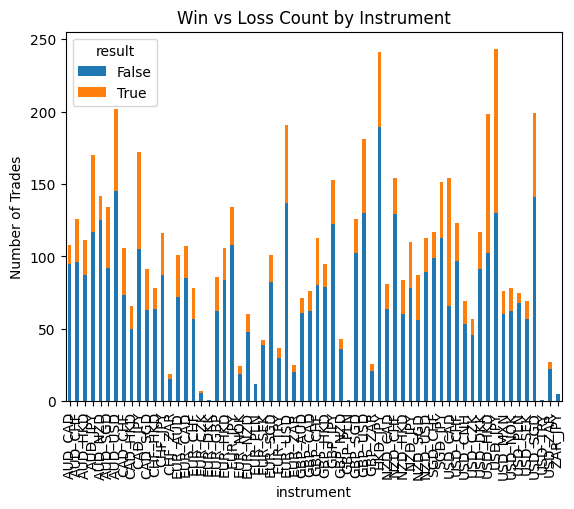

In [63]:
# 4. Win/Loss counts by instrument
plt.figure(figsize=(8,5))
(df.assign(result=df["realizedPL"] > 0)
   .groupby(["instrument","result"])["tradeID"]
   .count()
   .unstack(fill_value=0)
   .plot(kind="bar", stacked=True))
plt.title("Win vs Loss Count by Instrument")
plt.ylabel("Number of Trades")
plt.show()